# Consumer Shopping Trends

The dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels. Key features may include:

Transaction Details: Purchase date, transaction value, product category, and payment method.

Customer Information: Age group, gender, location, and loyalty status.

Shopping Behavior: Frequency of purchases, average spend per transaction, and seasonal trends.

# Importing libraries and Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('shopping_trends.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.set_index('Customer ID', inplace=True)
df.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1557,43,Male,Hoodie,Clothing,57,Alabama,M,Gold,Fall,2.7,No,Venmo,Standard,Yes,Yes,26,Credit Card,Quarterly
594,67,Male,Coat,Outerwear,35,Alaska,S,Green,Winter,4.4,Yes,Cash,Store Pickup,Yes,Yes,9,PayPal,Every 3 Months
2063,54,Male,Coat,Outerwear,63,South Carolina,L,Silver,Fall,2.8,No,PayPal,Standard,No,No,15,Cash,Quarterly
2220,33,Male,Blouse,Clothing,91,Minnesota,S,Purple,Fall,2.8,No,PayPal,Store Pickup,No,No,16,Bank Transfer,Fortnightly
1618,43,Male,Blouse,Clothing,64,Wisconsin,M,Peach,Winter,4.3,No,PayPal,Standard,Yes,Yes,50,Credit Card,Fortnightly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [6]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

In [7]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [8]:
numeric_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

                            Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000000              -0.010424      -0.021949   
Purchase Amount (USD) -0.010424               1.000000       0.030776   
Review Rating         -0.021949               0.030776       1.000000   
Previous Purchases     0.040445               0.008063       0.004229   

                       Previous Purchases  
Age                              0.040445  
Purchase Amount (USD)            0.008063  
Review Rating                    0.004229  
Previous Purchases               1.000000  


# EDA

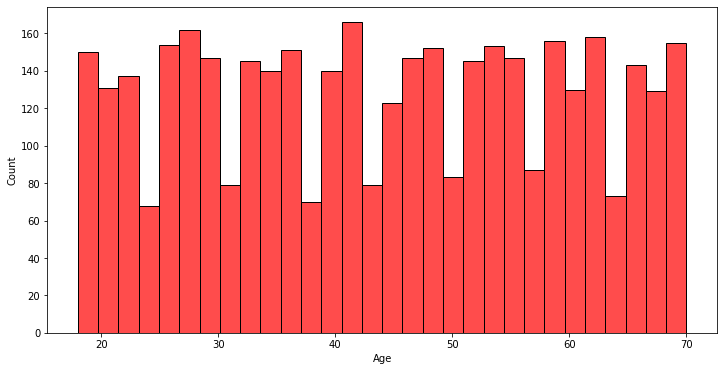

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['Age'],bins= 30, color="red", edgecolor="black", alpha=0.7)
plt.show()

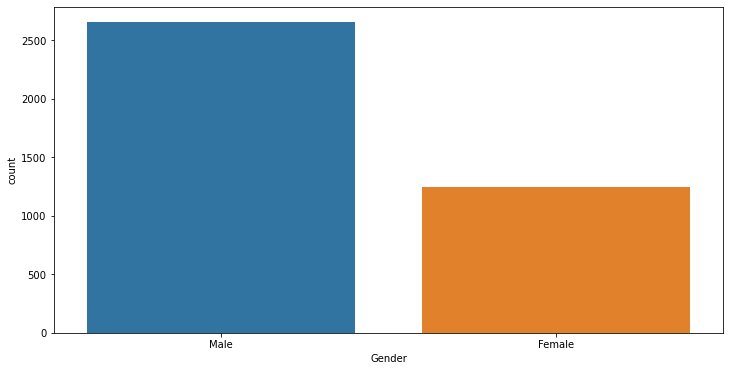

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Gender'], hue=df['Gender'])
plt.show()

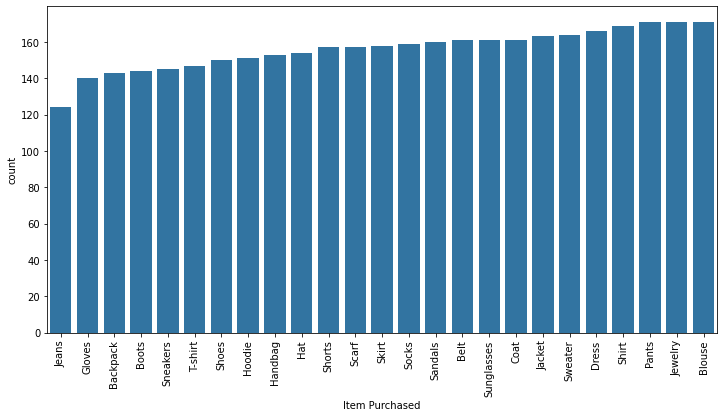

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Item Purchased'],order=df['Item Purchased'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.show()

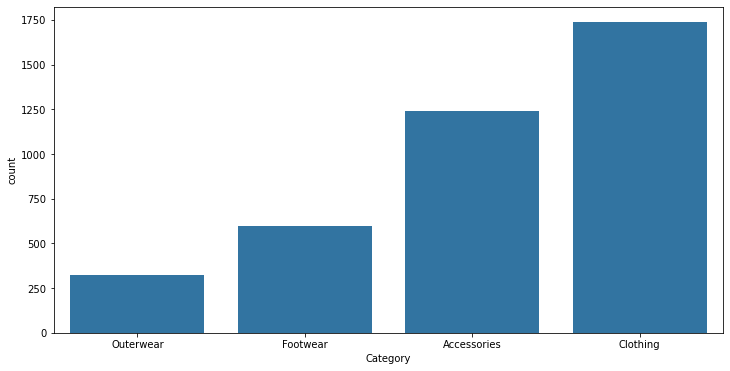

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Category'],order=df['Category'].value_counts(ascending=True).index)
plt.show()

In [13]:
df.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1518,57,Male,Gloves,Accessories,41,New Hampshire,M,Violet,Spring,3.4,No,PayPal,Standard,Yes,Yes,12,Cash,Quarterly
482,46,Male,Hat,Accessories,88,Wisconsin,L,Peach,Fall,3.2,Yes,PayPal,2-Day Shipping,Yes,Yes,10,PayPal,Fortnightly
841,42,Male,Shirt,Clothing,24,Alabama,L,Teal,Summer,4.2,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,18,PayPal,Weekly
3278,59,Female,Skirt,Clothing,86,Texas,M,Blue,Spring,4.9,No,Cash,Store Pickup,No,No,3,Credit Card,Monthly
229,18,Male,Socks,Clothing,79,New Hampshire,M,White,Spring,2.9,Yes,Credit Card,Store Pickup,Yes,Yes,11,Credit Card,Annually


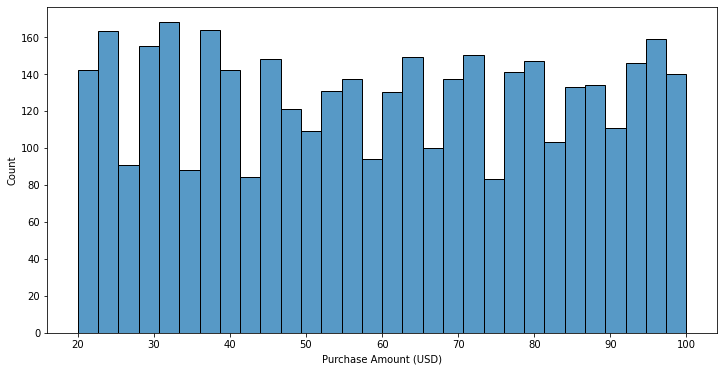

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Purchase Amount (USD)'],bins=30)
plt.show()

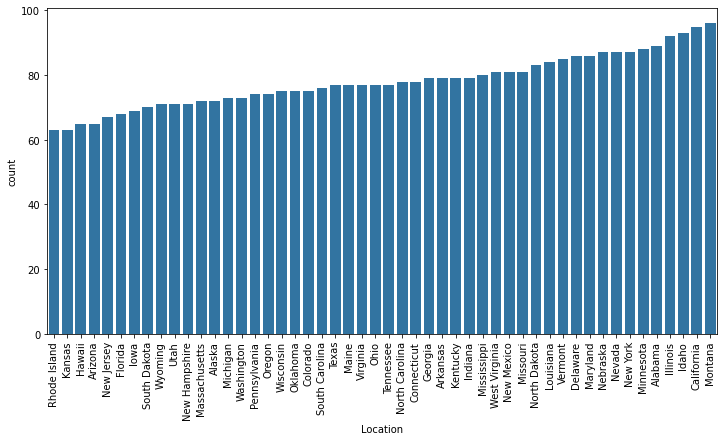

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Location'],order=df['Location'].value_counts(ascending=True).index)
plt.xticks(rotation=90) 
plt.show()

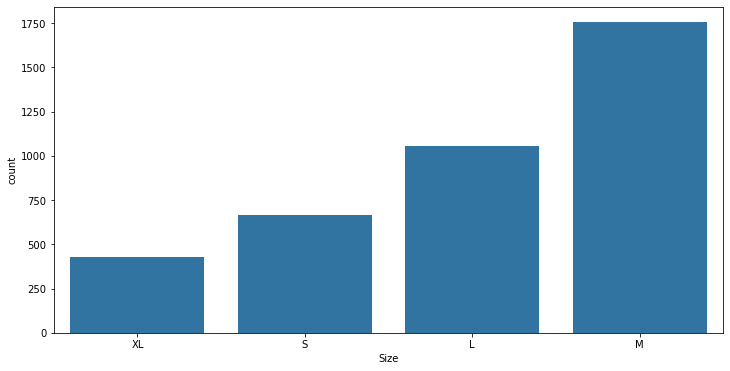

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Size'],order=df['Size'].value_counts(ascending=True).index)
plt.show()

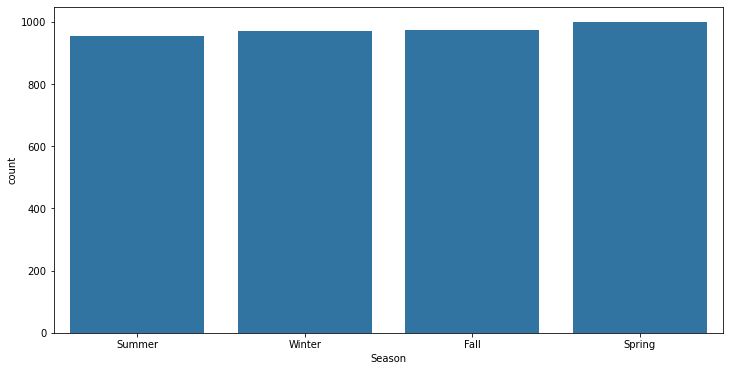

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Season'],order=df['Season'].value_counts(ascending=True).index) 
plt.show()

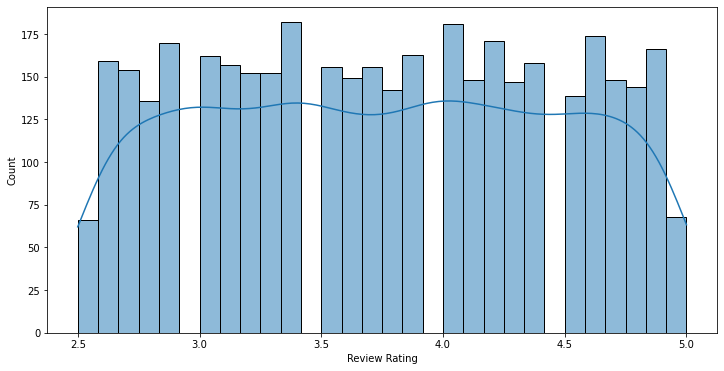

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Review Rating'],bins=30,kde=True)
plt.show()

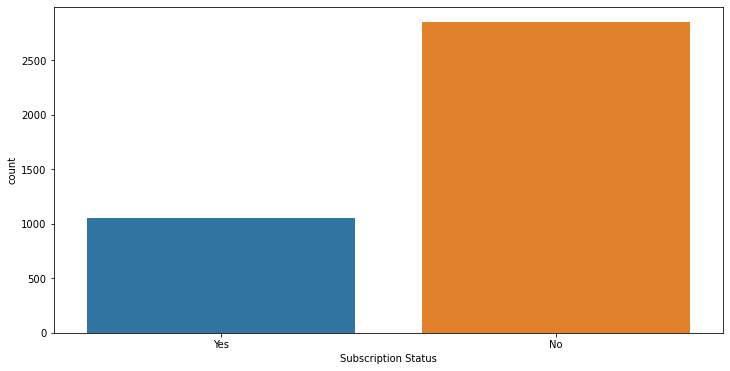

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Subscription Status'], hue=df['Subscription Status'])
plt.show()

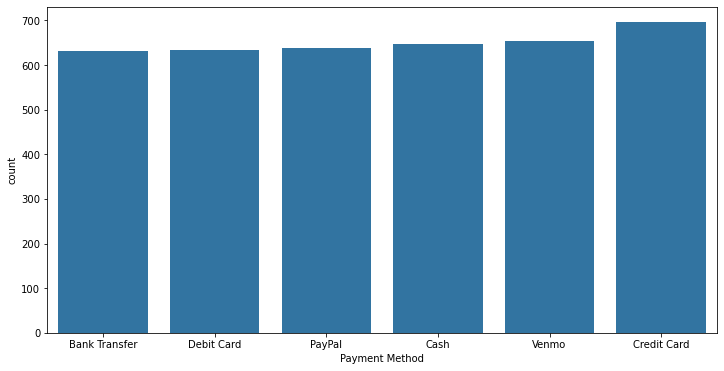

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Payment Method'],order=df['Payment Method'].value_counts(ascending=True).index)
plt.show()

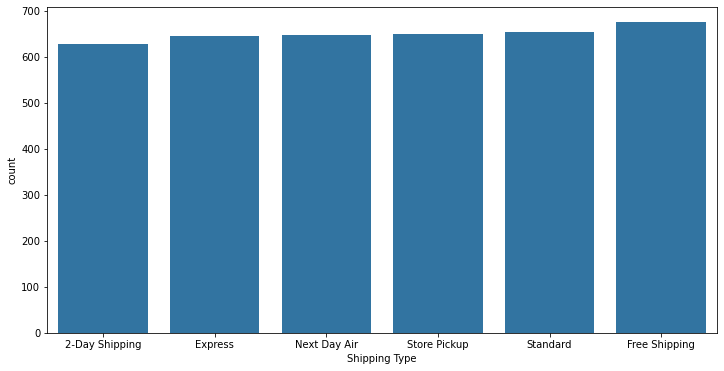

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Shipping Type'],order=df['Shipping Type'].value_counts(ascending=True).index)
plt.show()

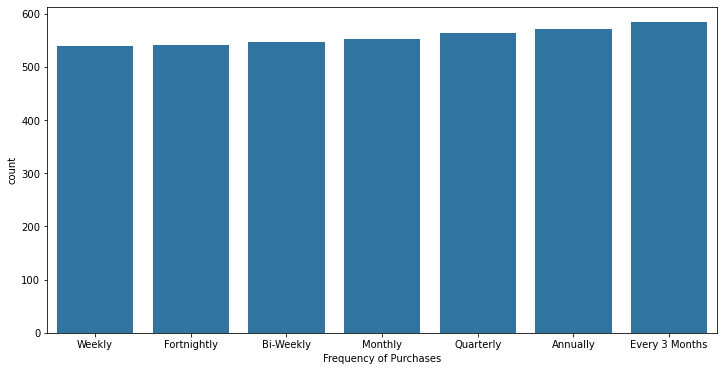

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Frequency of Purchases'],order=df['Frequency of Purchases'].value_counts(ascending=True).index)
plt.show()

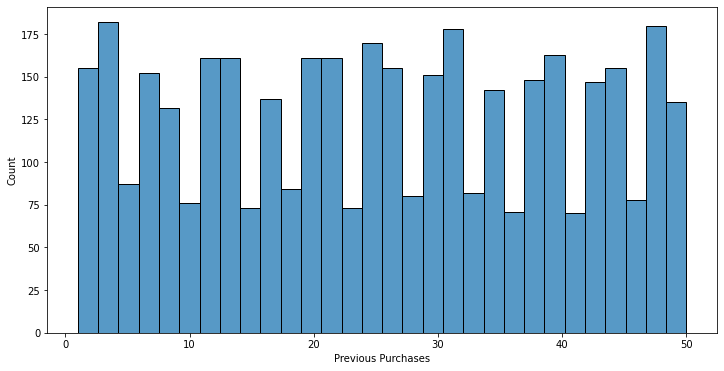

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Previous Purchases'],bins=30)
plt.show()

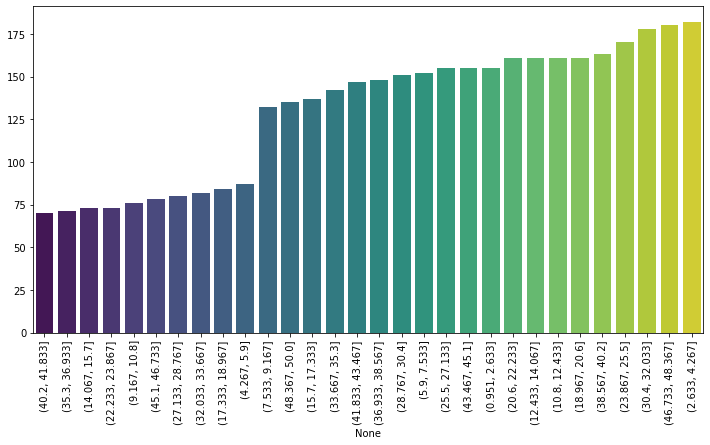

In [24]:
plt.figure(figsize=(12,6))
bins = pd.cut(df['Previous Purchases'], bins=30)  # Create 10 bins (ranges)

# Count frequencies of each bin and sort by frequency
bin_counts = bins.value_counts().sort_values(ascending=True)
sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, hue =bin_counts.index.astype(str),palette='viridis')
plt.xticks(rotation=90) 
plt.show()

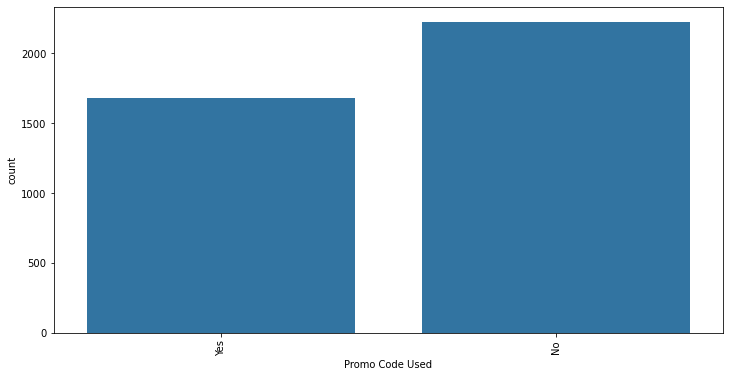

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Promo Code Used'],order=df['Promo Code Used'].value_counts(ascending=True).index
) 
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Discount Applied', ylabel='count'>

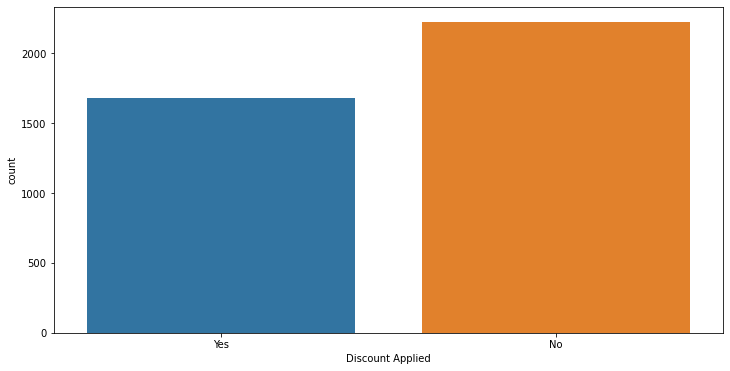

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Discount Applied'],hue=df['Discount Applied'], order=df['Discount Applied'].value_counts(ascending=True).index) 

In [27]:
df['Promo Code Used'].value_counts()
df['Discount Applied'].value_counts()

No     2223
Yes    1677
Name: Discount Applied, dtype: int64

In [28]:
df.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
3557,70,Female,Sweater,Clothing,88,Arizona,M,Brown,Fall,4.2,No,Bank Transfer,Express,No,No,43,Cash,Bi-Weekly
729,29,Male,Jeans,Clothing,78,Nebraska,M,Pink,Winter,3.7,Yes,Debit Card,Next Day Air,Yes,Yes,12,PayPal,Every 3 Months
1869,23,Male,Gloves,Accessories,58,Indiana,M,Silver,Spring,4.7,No,Bank Transfer,Next Day Air,No,No,44,Cash,Fortnightly
2812,69,Female,Jacket,Outerwear,89,Ohio,M,Blue,Fall,3.7,No,PayPal,Store Pickup,No,No,19,Credit Card,Quarterly
2022,62,Male,Handbag,Accessories,33,Maine,M,Green,Winter,4.4,No,Debit Card,Standard,No,No,48,Venmo,Quarterly


<AxesSubplot:xlabel='Purchase Amount (USD)'>

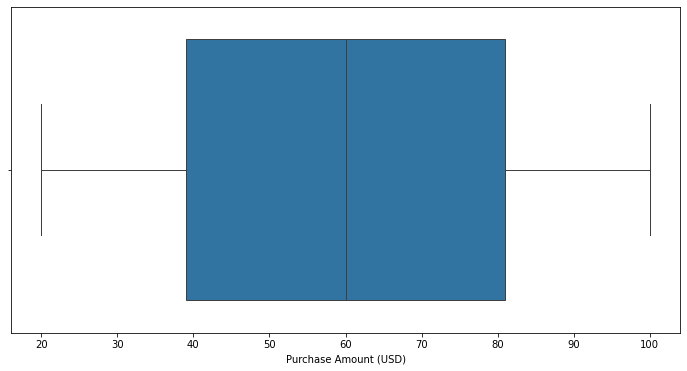

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Purchase Amount (USD)'])

<AxesSubplot:xlabel='Previous Purchases'>

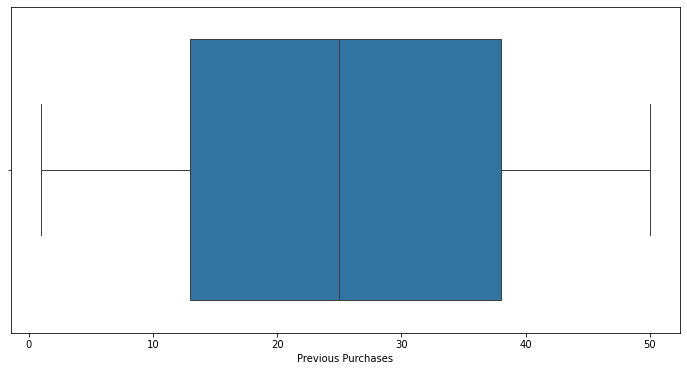

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Previous Purchases'])

<AxesSubplot:xlabel='Review Rating'>

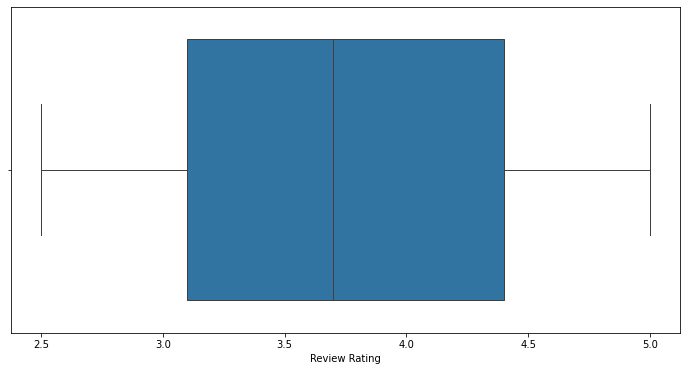

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Review Rating'])

In [32]:
df.drop(columns='Promo Code Used',inplace=True)

In [33]:
df.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
3866,25,Female,Shorts,Clothing,42,Nebraska,M,Olive,Spring,4.2,No,Cash,Store Pickup,No,28,Cash,Every 3 Months
2758,39,Female,Hat,Accessories,98,Delaware,XL,Brown,Fall,4.3,No,Cash,Next Day Air,No,11,Venmo,Monthly
1547,60,Male,Sneakers,Footwear,51,Oregon,XL,Purple,Summer,3.8,No,Credit Card,Express,Yes,17,Bank Transfer,Annually
2264,44,Male,Scarf,Accessories,40,Indiana,XL,Green,Winter,3.5,No,PayPal,Store Pickup,No,42,Cash,Quarterly
2478,25,Male,Gloves,Accessories,40,California,L,Turquoise,Spring,3.8,No,Debit Card,2-Day Shipping,No,29,PayPal,Weekly


<AxesSubplot:xlabel='Age', ylabel='Purchase Amount (USD)'>

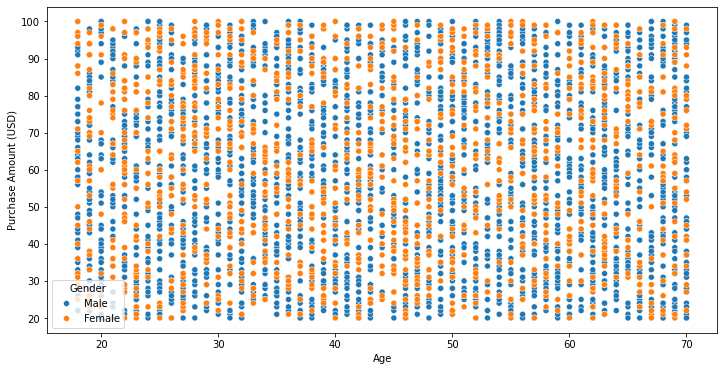

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Age'],y=df['Purchase Amount (USD)'],hue=df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Review Rating'>

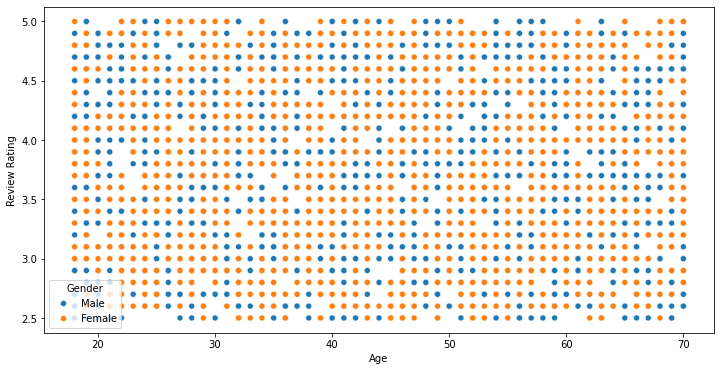

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Age'],y=df['Review Rating'],hue=df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Previous Purchases'>

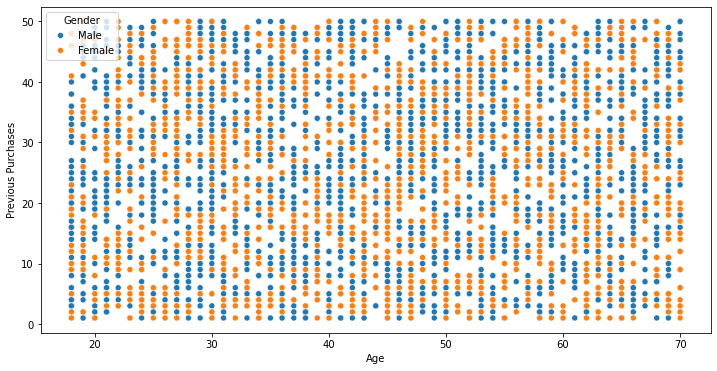

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Age'],y=df['Previous Purchases'],hue=df['Gender'])

<AxesSubplot:xlabel='Category', ylabel='Age'>

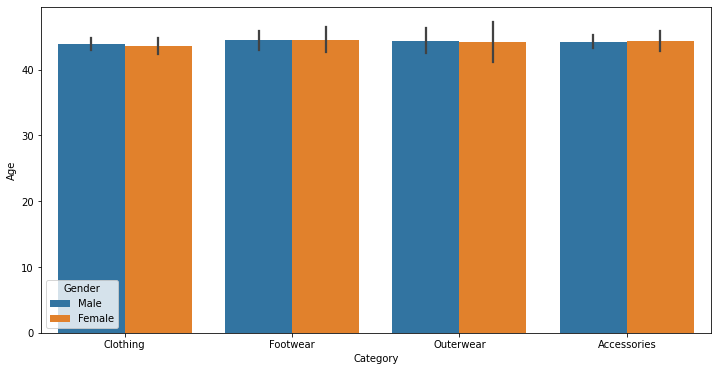

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Category'],y=df['Age'],hue=df['Gender'])

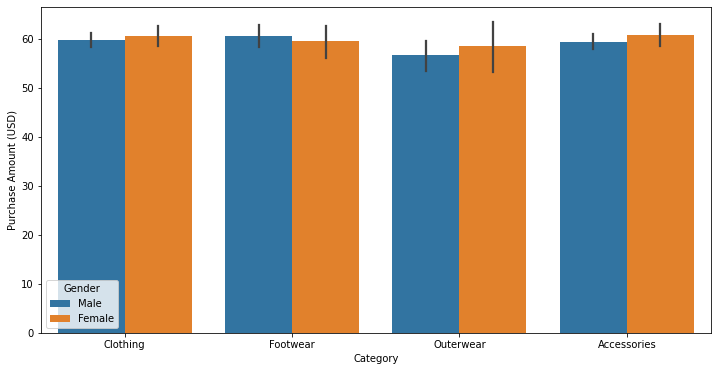

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Category'],y=df['Purchase Amount (USD)'],hue=df['Gender'],dodge=True)
plt.show()

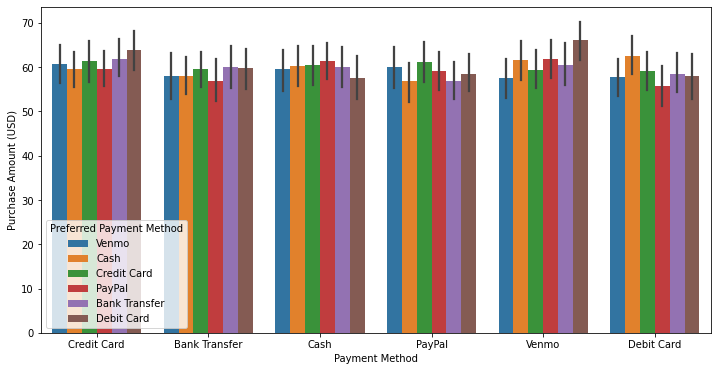

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Payment Method'],y=df['Purchase Amount (USD)'],hue=df['Preferred Payment Method'],dodge=True)
plt.show()

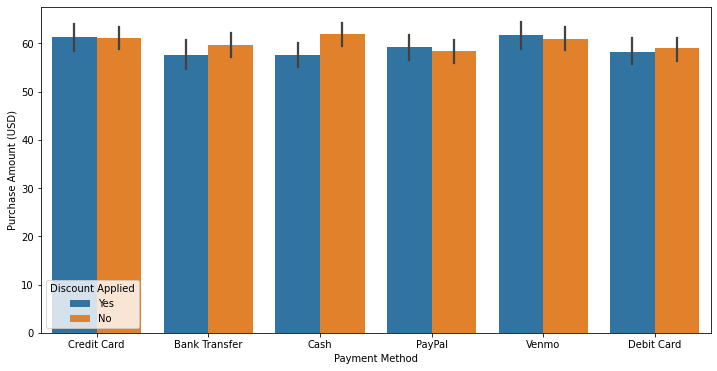

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Payment Method'],y=df['Purchase Amount (USD)'],hue=df['Discount Applied'],dodge=True)
plt.show()

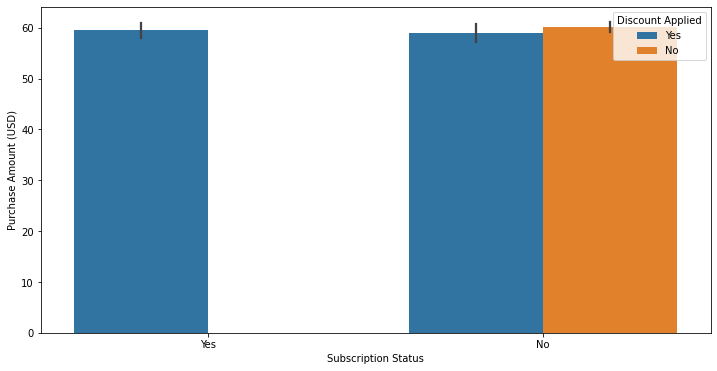

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Subscription Status'],y=df['Purchase Amount (USD)'],hue=df['Discount Applied'],dodge=True)
plt.show()

# Finding the REASON for getting DISCOUNT without a SUBSCRIPTION

<AxesSubplot:xlabel='Discount Applied', ylabel='Purchase Amount (USD)'>

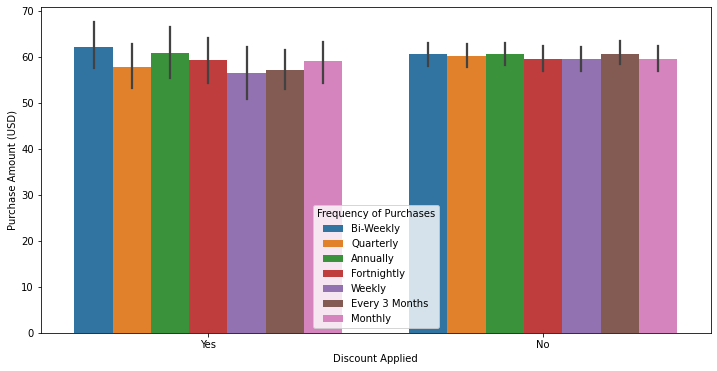

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Discount Applied',y='Purchase Amount (USD)',hue='Frequency of Purchases',data=df[df['Subscription Status']=='No'],dodge=True)

<AxesSubplot:xlabel='Discount Applied', ylabel='Previous Purchases'>

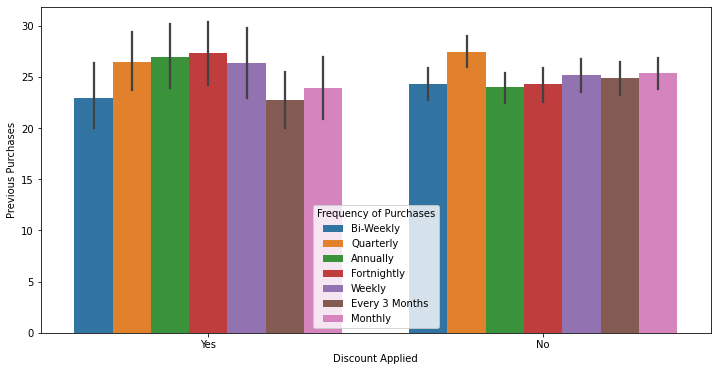

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='Discount Applied',y='Previous Purchases',hue='Frequency of Purchases',data=df[df['Subscription Status']=='No'],dodge=True)

In [44]:
data=df[df['Subscription Status']=='No']
data.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
3640,26,Female,Coat,Outerwear,44,Illinois,M,Brown,Summer,3.6,No,Venmo,2-Day Shipping,No,39,Venmo,Annually
2439,32,Male,Jeans,Clothing,20,Delaware,S,Cyan,Winter,3.4,No,Cash,Express,No,30,Venmo,Weekly
1233,57,Male,Handbag,Accessories,23,New York,M,Charcoal,Summer,3.6,No,Cash,Free Shipping,Yes,31,Debit Card,Every 3 Months
2353,70,Male,Boots,Footwear,46,Nebraska,M,Yellow,Fall,2.8,No,Credit Card,Store Pickup,No,25,Bank Transfer,Quarterly
3014,41,Female,Skirt,Clothing,55,Arizona,L,Peach,Summer,4.2,No,Debit Card,Store Pickup,No,13,Cash,Monthly


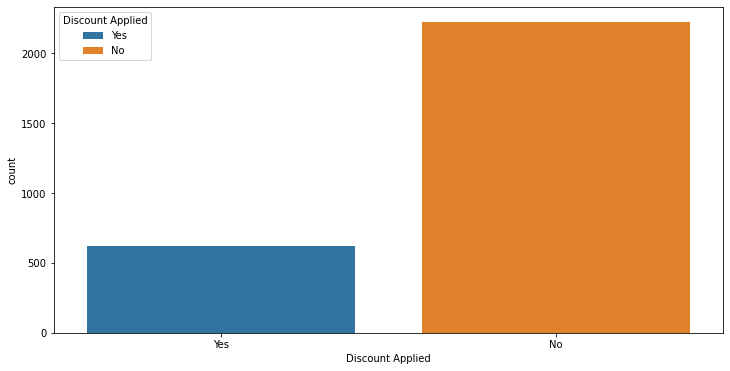

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Discount Applied'], hue=df['Discount Applied'])
plt.show()

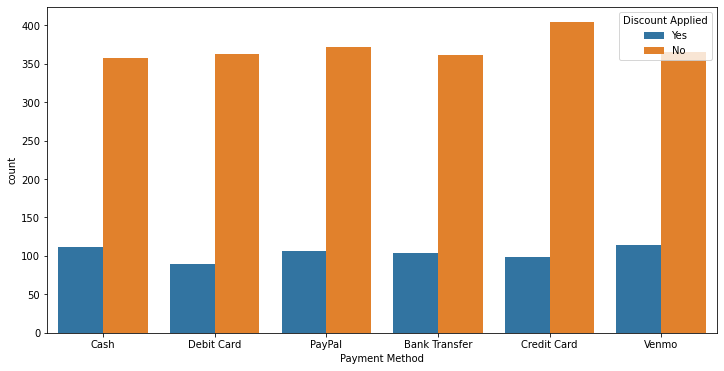

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Payment Method'],hue=data['Discount Applied'])
plt.show()

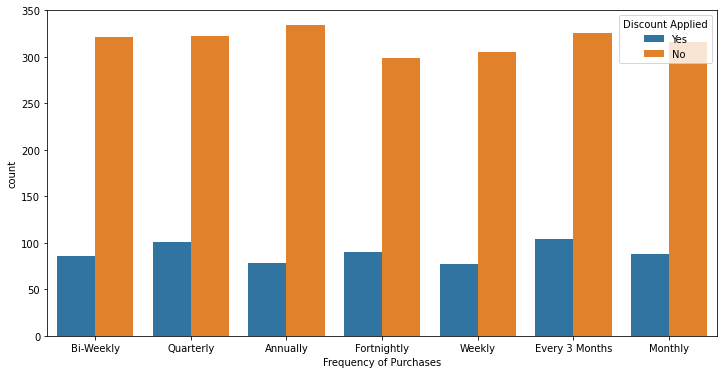

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Frequency of Purchases'],hue=data['Discount Applied'])
plt.show()

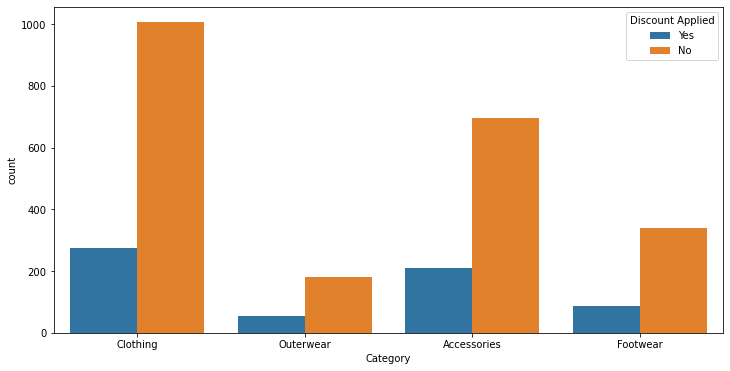

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Category'],hue=data['Discount Applied'])
plt.show()

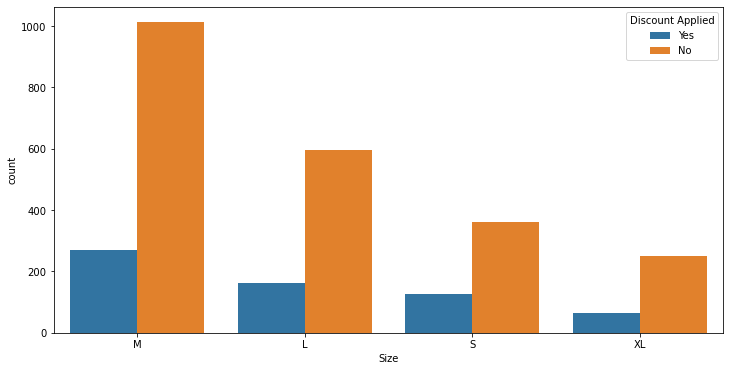

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Size'],hue=data['Discount Applied'])
plt.show()

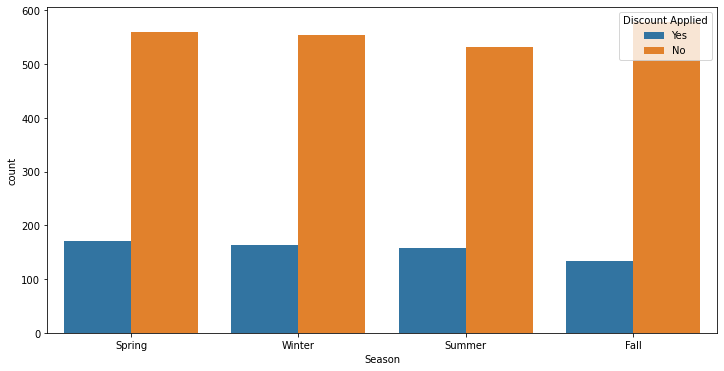

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Season'],hue=data['Discount Applied'])
plt.show()

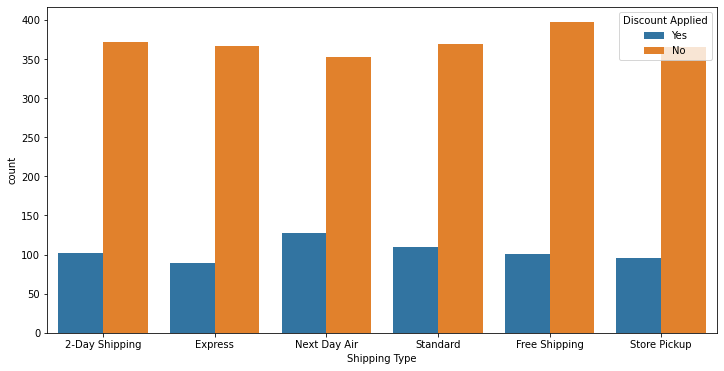

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Shipping Type'],hue=data['Discount Applied'])
plt.show()

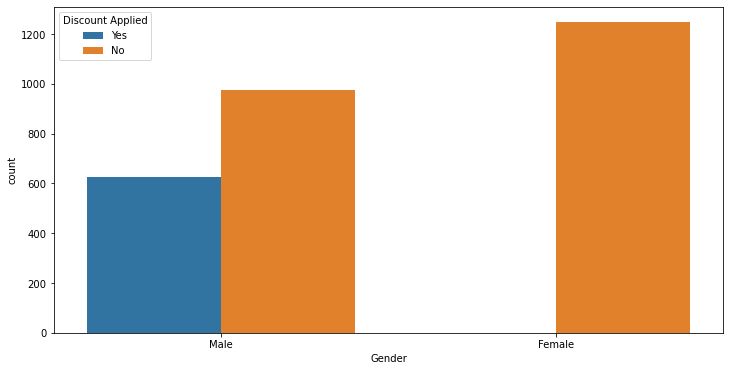

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Gender'],hue=data['Discount Applied'])
plt.show()

Here, in the above graph we can see no discounts for women.

In [53]:
discount=data[data['Gender']=='Male']
discount.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
2237,23,Male,T-shirt,Clothing,88,Louisiana,M,Yellow,Winter,2.7,No,Venmo,Standard,No,18,Debit Card,Fortnightly
1675,35,Male,Coat,Outerwear,56,Alaska,M,Peach,Winter,3.2,No,PayPal,Free Shipping,Yes,10,Debit Card,Fortnightly
1226,28,Male,Gloves,Accessories,97,North Carolina,S,Turquoise,Fall,2.6,No,Credit Card,Free Shipping,Yes,16,Debit Card,Weekly
2558,70,Male,Shorts,Clothing,23,Oklahoma,L,Cyan,Spring,3.9,No,Venmo,Standard,No,17,PayPal,Fortnightly
2117,67,Male,Jacket,Outerwear,23,Kansas,M,Teal,Summer,2.9,No,PayPal,Express,No,50,Debit Card,Bi-Weekly


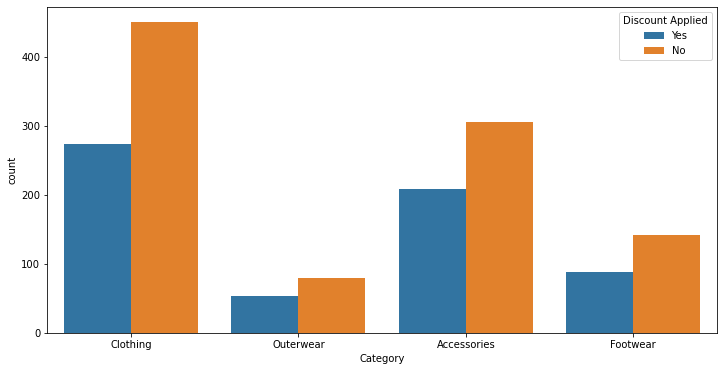

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category',hue='Discount Applied',data=discount)
plt.show()

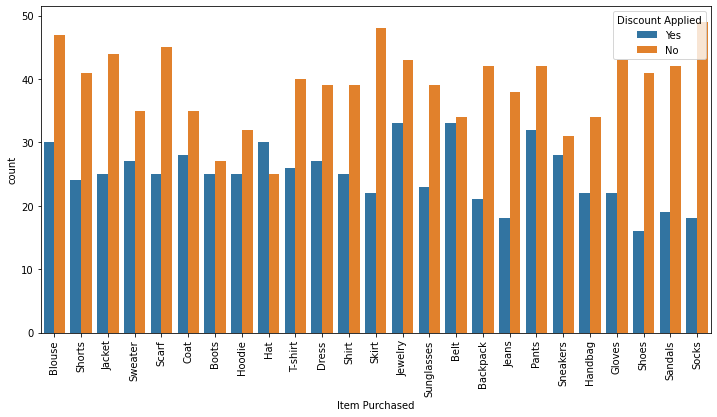

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='Item Purchased',hue='Discount Applied',data=discount)
plt.xticks(rotation=90) 
plt.show()

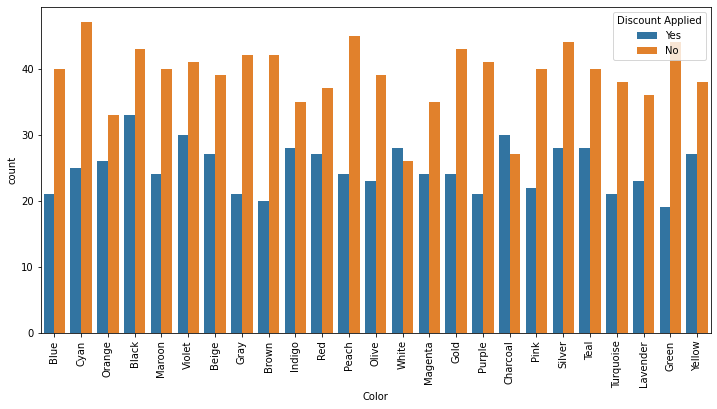

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x='Color', hue='Discount Applied', data=discount)
plt.xticks(rotation=90)
plt.show()


<AxesSubplot:xlabel='Purchase Amount (USD)', ylabel='Count'>

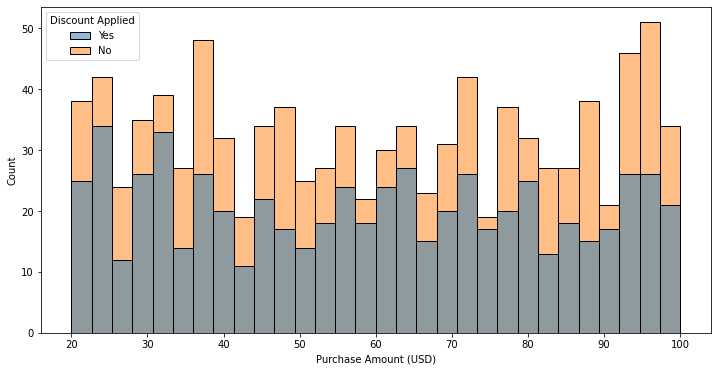

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(x='Purchase Amount (USD)',data=discount,bins=30,hue='Discount Applied')

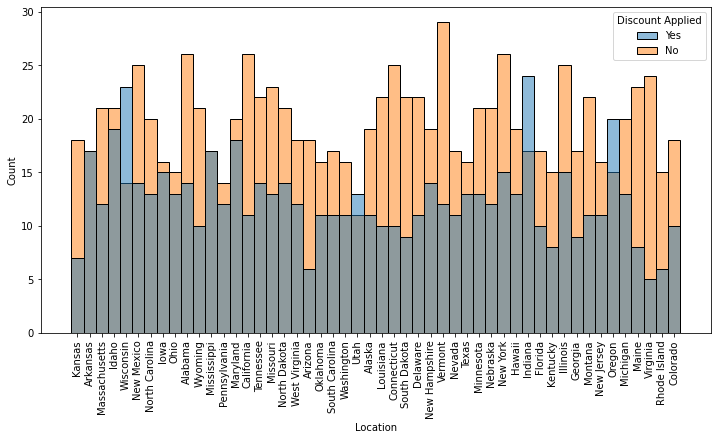

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(x='Location',data=discount,bins=30,hue='Discount Applied')
plt.xticks(rotation=90) 
plt.show()

<AxesSubplot:xlabel='Previous Purchases', ylabel='Count'>

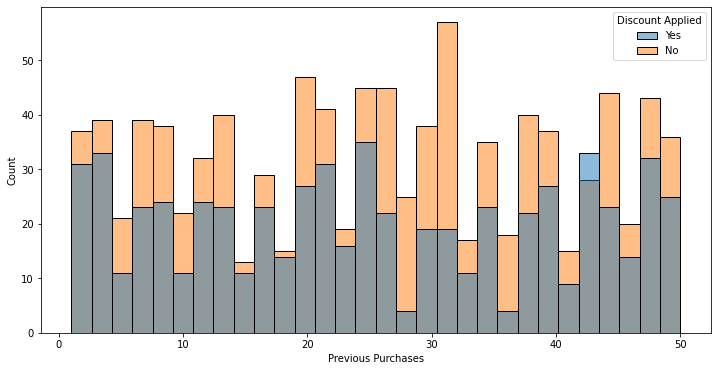

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(x='Previous Purchases',data=discount,bins=30,hue='Discount Applied')

In [60]:
new_data= discount[(discount['Category']=='Clothing') | (discount['Category']=='Accessories')]
new_data.sample(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1214,68,Male,Handbag,Accessories,52,Kentucky,XL,Black,Spring,3.7,No,Cash,Express,Yes,14,Debit Card,Every 3 Months
1947,59,Male,Pants,Clothing,49,Louisiana,M,White,Summer,4.5,No,Bank Transfer,Standard,No,41,Credit Card,Quarterly
1554,27,Male,Blouse,Clothing,45,Delaware,M,Indigo,Spring,4.8,No,PayPal,Free Shipping,Yes,21,Debit Card,Quarterly
1258,68,Male,Dress,Clothing,67,Minnesota,L,Gold,Spring,3.0,No,Cash,Free Shipping,Yes,31,Cash,Every 3 Months
1749,34,Male,Skirt,Clothing,93,Montana,L,Teal,Winter,3.9,No,Bank Transfer,2-Day Shipping,No,41,Bank Transfer,Annually


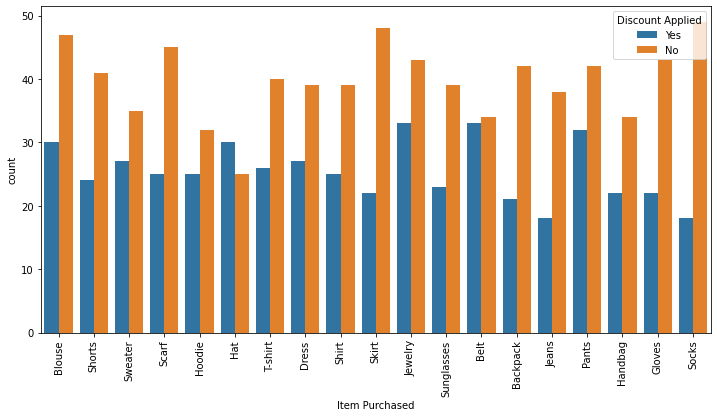

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='Item Purchased',hue='Discount Applied',data=new_data)
plt.xticks(rotation=90) 
plt.show()

In [62]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].sum()

Subscription Status
No     170436
Yes     62645
Name: Purchase Amount (USD), dtype: int64

In [63]:
df.groupby('Category')['Purchase Amount (USD)'].sum()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

In [64]:
df.groupby(['Gender','Subscription Status','Discount Applied'])['Purchase Amount (USD)'].sum()

Gender  Subscription Status  Discount Applied
Female  No                   No                  75191
Male    No                   No                  58479
                             Yes                 36766
        Yes                  Yes                 62645
Name: Purchase Amount (USD), dtype: int64

# KEY INSIGHTS:

Men are major customers Discounts only available via Promo Codes Everyone having subscription gets Discounts or Promo Codes People with no subscription may or may not get discounts But NO subscription available for Women No Discounts for Women even though Men without subscription can get discounts High Chances of Discounts in Clothing and Accessories category for Men without subscription in: Jewellery, Belt, Pant, Snickers in Cities like Oregon, Indiana, Utah, Iowa, Maryland, Ohio, Missisipi, Idaho, Wisconsin, Arkansas.